In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [49]:
traindata = np.loadtxt('data/D2z.txt', delimiter=' ')
trainset = pd.read_csv('data/D2z.txt', delimiter=' ',header=None)
X_train = traindata[:, :2]  # we only take the first two features for simplicity
y_train = traindata[:,2]

clf = KNeighborsClassifier(1)
# Train the classifier
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .1  # step size in the mesh
d_min,d_max = -2, 2.1 
xx, yy = np.meshgrid(np.arange(d_min, d_max, h),
                     np.arange(d_min, d_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

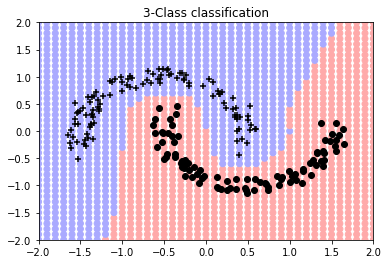

In [52]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
pos_df = trainset[(trainset[2] == 1)]
neg_df = trainset[(trainset[2] == 0)]
# Plot the test data
plt.figure()
plt.scatter(xx, yy, c=Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(pos_df[0], pos_df[1], c='black', marker="+")
plt.scatter(neg_df[0], neg_df[1], c='black', marker="o")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("3-Class classification")

plt.show()